In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
df=pd.read_csv('./train.csv')
from tensorflow.keras import datasets, layers, models
import os
from os import listdir
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import datasets, layers, models
import glob
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score

In [3]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]

#  Loading each model I saved And testing it with the Test Data

In [16]:

#acc=accuracy_score(test2['Most Common Result'],test2['UserClassification'])
#print( "Mode: " +str(acc))

for modelName in os.listdir('saved_model'):
    predList=[]
    count=0
    model=models.load_model('saved_model/'+str(modelName))
    for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
    test['labels '+str(modelName)]=predList

NameError: name 'test' is not defined

In [54]:

test.to_csv("test_results.csv")
test
#Im saving the dataframe so i can go through it myself and see if The labels it gave are accurate

,image_name,labels,labels 4ConvoLayeRotation20Shear45,labels 4ConvoLayerZoom30,labels 4ConvoLayerZoom45,labels 4ConvoLayerZoom60,labels model1,labels model2ConvoBatchNorm,labels model3ConvoBatchNorm,labels model3ConvoLayerNorm,labels model4ConvoLayerNorm
0,3.jpg,0,0,1,5,2,5,5,5,0,1
1,5.jpg,0,0,0,0,0,0,0,0,0,0
2,6.jpg,4,4,4,4,4,0,0,4,4,4
3,11.jpg,4,2,2,2,2,2,0,4,4,4
4,14.jpg,5,5,5,5,5,2,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...
145,494.jpg,3,3,3,3,3,0,0,5,3,3
146,497.jpg,5,5,5,5,5,2,5,4,5,1
147,498.jpg,2,2,2,2,2,2,2,2,2,2
148,499.jpg,2,2,2,2,2,2,1,4,2,2


# Loading csv with my own classification , mode of all preditions and predictions made previously

In [2]:
test2=pd.read_csv('test_results(1).csv')
test2

,Unnamed: 0,image_name,UserClassification,Most Common Result,labels 4ConvoLayeRotation20Shear45,labels 4ConvoLayerZoom30,labels 4ConvoLayerZoom45,labels 4ConvoLayerZoom60,labels model1,labels model2ConvoBatchNorm,labels model3ConvoBatchNorm,labels model3ConvoLayerNorm,labels model4ConvoLayerNorm,Most Common Result.1
0,0,3.jpg,5,5,0,1,5,2,5,5,5,0,1,5
1,1,5.jpg,0,0,0,0,0,0,0,0,0,0,0,0
2,2,6.jpg,4,4,4,4,4,4,0,0,4,4,4,4
3,3,11.jpg,2,2,2,2,2,2,2,0,4,4,4,2
4,4,14.jpg,5,5,5,5,5,5,2,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,494.jpg,2,3,3,3,3,3,0,0,5,3,3,3
146,146,497.jpg,5,5,5,5,5,5,2,5,4,5,1,5
147,147,498.jpg,3,2,2,2,2,2,2,2,2,2,2,2
148,148,499.jpg,3,2,2,2,2,2,2,1,4,2,2,2


# Getting Accuracy Scores comparing how each model did compared to how i classifiyed

Mode: 0.68
a 4ConvoLayeRotation20Shear45: 0.6
b 4ConvoLayerZoom30: 0.64
c 4ConvoLayerZoom45: 0.6733333333333333
d 4ConvoLayerZoom60: 0.66
e model1: 0.17333333333333334
f model2ConvoBatchNorm: 0.44
g model3ConvoBatchNorm: 0.4066666666666667
h model3ConvoLayerNorm: 0.58
i model4ConvoLayerNorm: 0.54


<BarContainer object of 9 artists>

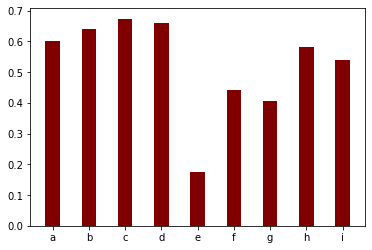

In [18]:

acc=accuracy_score(test2['Most Common Result'],test2['UserClassification'])
print( "Mode: " +str(acc))
modelnames=[]
accuracy=[]
count=0
alpha="abcdefghijklmnopqrstuvwxyz"
for modelName in os.listdir('saved_model'):
        label='labels '+str(modelName)
        acc=accuracy_score(test2[label],test2['UserClassification'])
        print(str(alpha[count]+" " +str(modelName)+ ": " +str(acc)))
        modelnames.append(alpha[count])
        accuracy.append(acc)
        count+=1

plot=plt.bar(modelnames, accuracy, color ='maroon',
        width = 0.4,)


# Removing Mountains #2 and #3 Glaciers since these seem to be the most confused

In [19]:

test2 = test2[test2['UserClassification']!= 2]
test2 = test2[test2['UserClassification']!= 3]
test2

,Unnamed: 0,image_name,UserClassification,Most Common Result,labels 4ConvoLayeRotation20Shear45,labels 4ConvoLayerZoom30,labels 4ConvoLayerZoom45,labels 4ConvoLayerZoom60,labels model1,labels model2ConvoBatchNorm,labels model3ConvoBatchNorm,labels model3ConvoLayerNorm,labels model4ConvoLayerNorm,Most Common Result.1
0,0,3.jpg,5,5,0,1,5,2,5,5,5,0,1,TRUE
1,1,5.jpg,0,0,0,0,0,0,0,0,0,0,0,0
2,2,6.jpg,4,4,4,4,4,4,0,0,4,4,4,4
4,4,14.jpg,5,5,5,5,5,5,2,5,5,5,5,5
5,5,22.jpg,1,1,1,1,1,1,5,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,485.jpg,4,4,4,4,4,4,2,0,5,4,4,4
141,141,487.jpg,4,4,4,4,2,4,2,4,5,4,4,4
144,144,493.jpg,1,1,1,1,1,1,5,1,1,1,1,1
146,146,497.jpg,5,5,5,5,5,5,2,5,4,5,1,5


In [98]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(test2['Most Common Result'],test2['UserClassification'])
for modelName in os.listdir('saved_model'):
        label='labels '+str(modelName)
        acc=accuracy_score(test2[label],test2['UserClassification'])
        print(modelName+ ": " +str(acc))

4ConvoLayeRotation20Shear45: 0.75
4ConvoLayerZoom30: 0.8636363636363636
4ConvoLayerZoom45: 0.7954545454545454
4ConvoLayerZoom60: 0.7727272727272727
model1: 0.20454545454545456
model2ConvoBatchNorm: 0.6704545454545454
model3ConvoBatchNorm: 0.6590909090909091
model3ConvoLayerNorm: 0.8181818181818182
model4ConvoLayerNorm: 0.7613636363636364


As Seen by the data the models performed signifigantly better when the mountain and Glacier examples were ignored which seems like a sign that those labels are very commonly confused

0=Buildings
1= Forest
2= Mountains
3=Glaciers
4=Sea
5=Street

# Isolating Mountains and Glaciers to see how bad the models did

In [110]:
test2=pd.read_csv('test_results(1).csv')
test2 = test2[test2['UserClassification']<=3 ]
test2 = test2[test2['UserClassification']>=2 ]
test2

,Unnamed: 0,image_name,UserClassification,Most Common Result,labels 4ConvoLayeRotation20Shear45,labels 4ConvoLayerZoom30,labels 4ConvoLayerZoom45,labels 4ConvoLayerZoom60,labels model1,labels model2ConvoBatchNorm,labels model3ConvoBatchNorm,labels model3ConvoLayerNorm,labels model4ConvoLayerNorm,Most Common Result.1
3,3,11.jpg,2,2,2,2,2,2,2,0,4,4,4,2
7,7,28.jpg,2,3,3,3,2,2,0,5,5,3,0,3
8,8,30.jpg,2,2,3,2,2,2,0,5,5,2,2,2
9,9,38.jpg,3,2,2,2,2,2,2,2,2,2,0,2
10,10,51.jpg,3,2,2,2,2,2,0,2,2,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,142,490.jpg,3,2,2,2,2,2,5,0,5,3,3,2
143,143,492.jpg,2,3,2,3,3,3,0,5,5,4,4,3
145,145,494.jpg,2,3,3,3,3,3,0,0,5,3,3,3
147,147,498.jpg,3,2,2,2,2,2,2,2,2,2,2,2


a 4ConvoLayeRotation20Shear45: 0.75
b 4ConvoLayerZoom30: 0.8636363636363636
c 4ConvoLayerZoom45: 0.7954545454545454
d 4ConvoLayerZoom60: 0.7727272727272727
e model1: 0.20454545454545456
f model2ConvoBatchNorm: 0.6704545454545454
g model3ConvoBatchNorm: 0.6590909090909091
h model3ConvoLayerNorm: 0.8181818181818182
i model4ConvoLayerNorm: 0.7613636363636364


<BarContainer object of 9 artists>

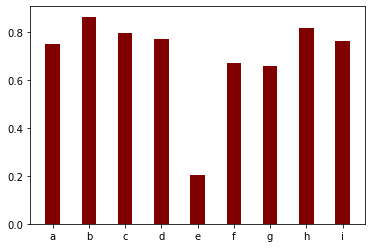

In [20]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(test2['Most Common Result'],test2['UserClassification'])
modelnames=[]
accuracy=[]
count=0
alpha="abcdefghijklmnopqrstuvwxyz"
for modelName in os.listdir('saved_model'):
        label='labels '+str(modelName)
        acc=accuracy_score(test2[label],test2['UserClassification'])
        print(str(alpha[count]+" " +str(modelName)+ ": " +str(acc)))
        modelnames.append(alpha[count])
        accuracy.append(acc)
        count+=1
plt.bar(modelnames, accuracy, color ='maroon',
        width = 0.4)

These numbers are quite conclusive that the models are indeed having trouble classifying mountains and glaciers

# Isolating images with buildings with a image set of 29 images I Made myself

In [21]:

for modelName in os.listdir('saved_model'):
    predList=[]
    count=0
    model=models.load_model('saved_model/'+str(modelName))
    for filename in os.listdir('Buildings'):
        img = image.load_img("Buildings/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
    zeros=np.zeros(29)
    print(str(modelName)+ ": " + str(accuracy_score(zeros,predList)))

4ConvoLayeRotation20Shear45: 0.7586206896551724
4ConvoLayerZoom30: 0.8275862068965517
4ConvoLayerZoom45: 0.6896551724137931
4ConvoLayerZoom60: 0.7241379310344828
model1: 0.6206896551724138
model2ConvoBatchNorm: 0.7241379310344828
model3ConvoBatchNorm: 0.5862068965517241
model3ConvoLayerNorm: 0.8620689655172413
model4ConvoLayerNorm: 0.8275862068965517


# Isolating images with Forest with a image set of 27 images I Made myself

In [4]:

for modelName in os.listdir('saved_model'):
    predList=[]
    count=0
    model=models.load_model('saved_model/'+str(modelName))
    for filename in os.listdir('Forest'):
        img = image.load_img("Forest/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==27):
            break
    ones=np.ones(27)
    print(str(modelName)+ ": " + str(accuracy_score(ones,predList)))

4ConvoLayeRotation20Shear45: 0.7407407407407407
4ConvoLayerZoom30: 0.8518518518518519
4ConvoLayerZoom45: 0.7037037037037037
4ConvoLayerZoom60: 0.8148148148148148
inception: 0.4074074074074074
inceptionZoom30: 0.07407407407407407
inceptionZoom30shear30: 0.6666666666666666
inceptionZoom45: 0.4074074074074074
model1: 0.0
model2ConvoBatchNorm: 0.7037037037037037
model3ConvoBatchNorm: 0.4074074074074074
model3ConvoLayerNorm: 0.7407407407407407
model4ConvoLayerNorm: 0.7777777777777778
ResNet50: 0.8888888888888888
vgg16: 0.8518518518518519
vgg16-2: 0.8518518518518519
vgg16ZoomRange45: 0.8148148148148148
vgg16ZoomRange45-2: 0.8518518518518519


# Isolating images of Mountains I found myself

In [5]:

for modelName in os.listdir('saved_model'):
    predList=[]
    count=0
    model=models.load_model('saved_model/'+str(modelName))
    for filename in os.listdir('Mountains'):
        img = image.load_img("Mountains/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==22):
            break
    twos=np.full((22),2)
    print(str(modelName)+ ": " + str(accuracy_score(twos,predList)))

4ConvoLayeRotation20Shear45: 0.22727272727272727
4ConvoLayerZoom30: 0.3181818181818182
4ConvoLayerZoom45: 0.22727272727272727
4ConvoLayerZoom60: 0.36363636363636365
inception: 0.0
inceptionZoom30: 0.09090909090909091
inceptionZoom30shear30: 0.0
inceptionZoom45: 0.22727272727272727
model1: 0.36363636363636365
model2ConvoBatchNorm: 0.045454545454545456
model3ConvoBatchNorm: 0.0
model3ConvoLayerNorm: 0.045454545454545456
model4ConvoLayerNorm: 0.0
ResNet50: 0.045454545454545456
vgg16: 0.5909090909090909
vgg16-2: 0.3181818181818182
vgg16ZoomRange45: 0.5909090909090909
vgg16ZoomRange45-2: 0.5909090909090909


# Isolating Images of Glaciers I found

In [6]:

for modelName in os.listdir('saved_model'):
    predList=[]
    count=0
    model=models.load_model('saved_model/'+str(modelName))
    for filename in os.listdir('Glacier'):
        img = image.load_img("Glacier/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==25):
            break
    threes=np.full((25),2)
    print(str(modelName)+ ": " + str(accuracy_score(threes,predList)))

4ConvoLayeRotation20Shear45: 0.68
4ConvoLayerZoom30: 0.92
4ConvoLayerZoom45: 1.0
4ConvoLayerZoom60: 0.92
inception: 0.0
inceptionZoom30: 0.04
inceptionZoom30shear30: 0.0
inceptionZoom45: 0.24
model1: 0.44
model2ConvoBatchNorm: 0.28
model3ConvoBatchNorm: 0.04
model3ConvoLayerNorm: 0.64
model4ConvoLayerNorm: 0.48
ResNet50: 0.0
vgg16: 0.6
vgg16-2: 0.6
vgg16ZoomRange45: 0.8
vgg16ZoomRange45-2: 0.6


It seems that The models do a better job of classifying Glaciers, lets see if the mountain classification is more accurate if we expect glaciers

# Mountain images tested but making the expected classification glacier to see if the models are constantly misclassifying as glacier

In [18]:

for modelName in os.listdir('saved_model'):
    predList=[]
    count=0
    model=models.load_model('saved_model/'+str(modelName))
    for filename in os.listdir('Mountains'):
        img = image.load_img("Mountains/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==22):
            break
    threes=np.full((22),3)
    print(str(modelName)+ ": " + str(accuracy_score(threes,predList)))

4ConvoLayeRotation20Shear45: 0.5909090909090909
4ConvoLayerZoom30: 0.45454545454545453
4ConvoLayerZoom45: 0.6818181818181818
4ConvoLayerZoom60: 0.5909090909090909
model1: 0.0
model2ConvoBatchNorm: 0.2727272727272727
model3ConvoBatchNorm: 0.22727272727272727
model3ConvoLayerNorm: 0.45454545454545453
model4ConvoLayerNorm: 0.4090909090909091


Overall it seems that the models are misclassifying mountains as glaciers based on the previous results

# Testing to see what the accuracy would be if both mountains and glaciers are classified as the same catagory

In [5]:

for modelName in os.listdir('saved_model'):
    predList=[]
    count=0
    model=models.load_model('saved_model/'+str(modelName))
    for filename in os.listdir('Mountains'):
        img = image.load_img("Mountains/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        if(pred.argmax()==3 or pred.argmax()==2):
            predList.append(3)
        else:
            predList.append(pred.argmax())
        count+=1
        if(count==22):
            break
    threes=np.full((22),3)
    print(str(modelName)+ ": " + str(accuracy_score(threes,predList)))

4ConvoLayeRotation20Shear45: 0.8181818181818182
4ConvoLayerZoom30: 0.7727272727272727
4ConvoLayerZoom45: 0.9090909090909091
4ConvoLayerZoom60: 0.9545454545454546
model1: 0.36363636363636365
model2ConvoBatchNorm: 0.3181818181818182
model3ConvoBatchNorm: 0.22727272727272727
model3ConvoLayerNorm: 0.5
model4ConvoLayerNorm: 0.4090909090909091


From these results it can be seen that the overall results seem much more accurate with a combined catarogy so it can be concluded that the model can distingush glaciers and mountains but not the diffrence between the two

# Isolating Sea images to test 

In [20]:

for modelName in os.listdir('saved_model'):
    predList=[]
    count=0
    model=models.load_model('saved_model/'+str(modelName))
    for filename in os.listdir('Sea'):
        img = image.load_img("Sea/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==27):
            break
    fours=np.full((27),4)
    print(str(modelName)+ ": " + str(accuracy_score(fours,predList)))

4ConvoLayeRotation20Shear45: 0.5925925925925926
4ConvoLayerZoom30: 0.6666666666666666
4ConvoLayerZoom45: 0.2962962962962963
4ConvoLayerZoom60: 0.6666666666666666
model1: 0.0
model2ConvoBatchNorm: 0.14814814814814814
model3ConvoBatchNorm: 0.48148148148148145
model3ConvoLayerNorm: 0.8518518518518519
model4ConvoLayerNorm: 0.6296296296296297


# Isolation Testing with self created Street image set

In [4]:

for modelName in os.listdir('saved_model'):
    predList=[]
    count=0
    model=models.load_model('saved_model/'+str(modelName))
    for filename in os.listdir('Street'):
        img = image.load_img("Street/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==28):
            break
    fives=np.full((28),5)
    print(str(modelName)+ ": " + str(accuracy_score(fives,predList)))

4ConvoLayeRotation20Shear45: 0.5714285714285714
4ConvoLayerZoom30: 0.75
4ConvoLayerZoom45: 0.6785714285714286
4ConvoLayerZoom60: 0.5714285714285714
model1: 0.25
model2ConvoBatchNorm: 0.4642857142857143
model3ConvoBatchNorm: 0.9285714285714286
model3ConvoLayerNorm: 0.6071428571428571
model4ConvoLayerNorm: 0.39285714285714285


# Testing what happens with the street classifacation if you combine street and buildings since almost all street images have buildings present

In [6]:

for modelName in os.listdir('saved_model'):
    predList=[]
    count=0
    model=models.load_model('saved_model/'+str(modelName))
    for filename in os.listdir('Street'):
        img = image.load_img("Street/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        if(pred.argmax()==0 or pred.argmax()==5):
            predList.append(5)
        else:
            predList.append(pred.argmax())
        count+=1
        if(count==28):
            break
    fives=np.full((28),5)
    print(str(modelName)+ ": " + str(accuracy_score(fives,predList)))

4ConvoLayeRotation20Shear45: 0.8214285714285714
4ConvoLayerZoom30: 0.8214285714285714
4ConvoLayerZoom45: 0.7142857142857143
4ConvoLayerZoom60: 0.6428571428571429
model1: 0.35714285714285715
model2ConvoBatchNorm: 0.7142857142857143
model3ConvoBatchNorm: 0.9285714285714286
model3ConvoLayerNorm: 0.7857142857142857
model4ConvoLayerNorm: 0.5


These results are not nearly as severe as the Glacer and mountain results but you do see an improvment in accuracy which does imply that their is overlap between the two

In [7]:
test2=pd.read_csv('test_results(1).csv')
test2

,Unnamed: 0,image_name,UserClassification,Most Common Result,labels 4ConvoLayeRotation20Shear45,labels 4ConvoLayerZoom30,labels 4ConvoLayerZoom45,labels 4ConvoLayerZoom60,labels model1,labels model2ConvoBatchNorm,labels model3ConvoBatchNorm,labels model3ConvoLayerNorm,labels model4ConvoLayerNorm,Most Common Result.1
0,0,3.jpg,5,5,0,1,5,2,5,5,5,0,1,TRUE
1,1,5.jpg,0,0,0,0,0,0,0,0,0,0,0,0
2,2,6.jpg,4,4,4,4,4,4,0,0,4,4,4,4
3,3,11.jpg,2,2,2,2,2,2,2,0,4,4,4,2
4,4,14.jpg,5,5,5,5,5,5,2,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,494.jpg,2,3,3,3,3,3,0,0,5,3,3,3
146,146,497.jpg,5,5,5,5,5,5,2,5,4,5,1,5
147,147,498.jpg,3,2,2,2,2,2,2,2,2,2,2,2
148,148,499.jpg,3,2,2,2,2,2,2,1,4,2,2,2


In [8]:
test2['UserClassification'].replace(5,0,inplace=True)
test2['UserClassification'].replace(3,2,inplace=True)
test2

,Unnamed: 0,image_name,UserClassification,Most Common Result,labels 4ConvoLayeRotation20Shear45,labels 4ConvoLayerZoom30,labels 4ConvoLayerZoom45,labels 4ConvoLayerZoom60,labels model1,labels model2ConvoBatchNorm,labels model3ConvoBatchNorm,labels model3ConvoLayerNorm,labels model4ConvoLayerNorm,Most Common Result.1
0,0,3.jpg,0,5,0,1,5,2,5,5,5,0,1,TRUE
1,1,5.jpg,0,0,0,0,0,0,0,0,0,0,0,0
2,2,6.jpg,4,4,4,4,4,4,0,0,4,4,4,4
3,3,11.jpg,2,2,2,2,2,2,2,0,4,4,4,2
4,4,14.jpg,0,5,5,5,5,5,2,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,494.jpg,2,3,3,3,3,3,0,0,5,3,3,3
146,146,497.jpg,0,5,5,5,5,5,2,5,4,5,1,5
147,147,498.jpg,2,2,2,2,2,2,2,2,2,2,2,2
148,148,499.jpg,2,2,2,2,2,2,2,1,4,2,2,2


In [9]:
test2['Most Common Result'].replace(3,2)
test2['Most Common Result'].replace(5,0)
for modelName in os.listdir('saved_model'):
        label='labels '+str(modelName)
        test2[label].replace(3,2,inplace=True)
        test2[label].replace(5,0,inplace=True)
test2[:50]


,Unnamed: 0,image_name,UserClassification,Most Common Result,labels 4ConvoLayeRotation20Shear45,labels 4ConvoLayerZoom30,labels 4ConvoLayerZoom45,labels 4ConvoLayerZoom60,labels model1,labels model2ConvoBatchNorm,labels model3ConvoBatchNorm,labels model3ConvoLayerNorm,labels model4ConvoLayerNorm,Most Common Result.1
0,0,3.jpg,0,5,0,1,0,2,0,0,0,0,1,TRUE
1,1,5.jpg,0,0,0,0,0,0,0,0,0,0,0,0
2,2,6.jpg,4,4,4,4,4,4,0,0,4,4,4,4
3,3,11.jpg,2,2,2,2,2,2,2,0,4,4,4,2
4,4,14.jpg,0,5,0,0,0,0,2,0,0,0,0,5
5,5,22.jpg,1,1,1,1,1,1,0,1,1,1,1,1
6,6,25.jpg,4,4,4,4,4,4,0,0,4,4,4,4
7,7,28.jpg,2,3,2,2,2,2,0,0,0,2,0,3
8,8,30.jpg,2,2,2,2,2,2,0,0,0,2,2,2
9,9,38.jpg,2,2,2,2,2,2,2,2,2,2,0,2


# Testing accuracy when mountains and glaciers are combined aswell as street and buildings

Mode: 0.6333333333333333
a 4ConvoLayeRotation20Shear45: 0.8533333333333334
b 4ConvoLayerZoom30: 0.92
c 4ConvoLayerZoom45: 0.8733333333333333
d 4ConvoLayerZoom60: 0.86
e model1: 0.2866666666666667
f model2ConvoBatchNorm: 0.6
g model3ConvoBatchNorm: 0.5133333333333333
h model3ConvoLayerNorm: 0.8333333333333334
i model4ConvoLayerNorm: 0.7266666666666667


<BarContainer object of 9 artists>

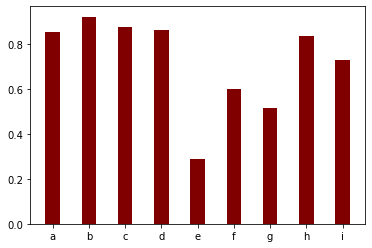

In [13]:
acc=accuracy_score(test2['Most Common Result'],test2['UserClassification'])
print( "Mode: " +str(acc))
modelnames=[]
accuracy=[]
count=0
alpha="abcdefghijklmnopqrstuvwxyz"
for modelName in os.listdir('saved_model'):
        label='labels '+str(modelName)
        acc=accuracy_score(test2[label],test2['UserClassification'])
        print(str(alpha[count]+" " +str(modelName)+ ": " +str(acc)))
        modelnames.append(alpha[count])
        accuracy.append(acc)
        count+=1
plt.bar(modelnames, accuracy, color ='maroon',
        width = 0.4)